# 0. Data Preprocessing
- Download dataset from https://www.superdatascience.com/machine-learning
- 사용할 유용한 라이브러리들을 임포트해줍니다

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- 이제 데이터를 pandas를 이용하여 import 해봅시다.

In [ ]:
dataset = pd.read_csv("Machine Learning A-Z Template Folder/Part 1 - Data Preprocessing/Data.csv")
dataset

- 항상 데이터셋을 보면 IV/DV를 구분지어줘야하는데, 해당 데이터셋은 간단하게 첫 세개의 칼럼이 IV일 테고, 마지막 칼럼이 DV가 되겠습니다.
- 이제 IV에 해당하는 칼럼들을 X에, DV에 해당하는 칼럼을 y에 저장시켜줍시다.

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

- 이제 X라는 Feature Matrix와 y라는 Target vector 가 생성이 되었습니다.
- X와 y라는 어레이로 나누어준 이유는 pandas Dataframe이 아니라, numpy 어레이로써 작업하는게 편의성 면에서 우월하기 때문이라고 합니다.
- 지금과 같이 데이터셋의 구조와 크기를 아는 상태에서는 index based로 iloc을 써줍니다.

##### X에서 NaN값들이 존재하는데 어떤 전략을 쓸지는 개인의 판단에 따라 다릅니다.
- 우리는 해당 column의 평균값으로 채워 넣어 주겠습니다.
- Missing Data 핸들링을 위해 scikit-learn의 imputer를 사용하겠습니다.

##### https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan)
X[:,1:3]  = imputer.fit_transform(X[:,1:3])

In [ ]:
X

- 이제 missing data는 없는데, Machine Learning 알고리즘들은 모두 숫자로 이루어 져있기때문에, 남아있는 숫자가 아닌 값들도 숫자화 시켜줘야합니다.
- Text Data를 encode하는것으로 가능합니다.
- X 와 y 에 있는 칼럼들을 인코딩해봅시다.

In [ ]:
#Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
x_encoder = ColumnTransformer([('iv_encoder',OneHotEncoder(sparse=False),[0]),],remainder='passthrough')
X = x_encoder.fit_transform(X)

In [ ]:
X

In [ ]:
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

In [ ]:
y

- 이제 데이터를 train,test 로 나눠줍시다.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_test

In [ ]:
X

### Feature Scaling
- 위에 Feature Matrix에서 Feature들 간의 스케일을 균등하게 해주는 작업
- 왜 필요할까요?

Screen Shot 2019-01-15 at 6.02.24 PM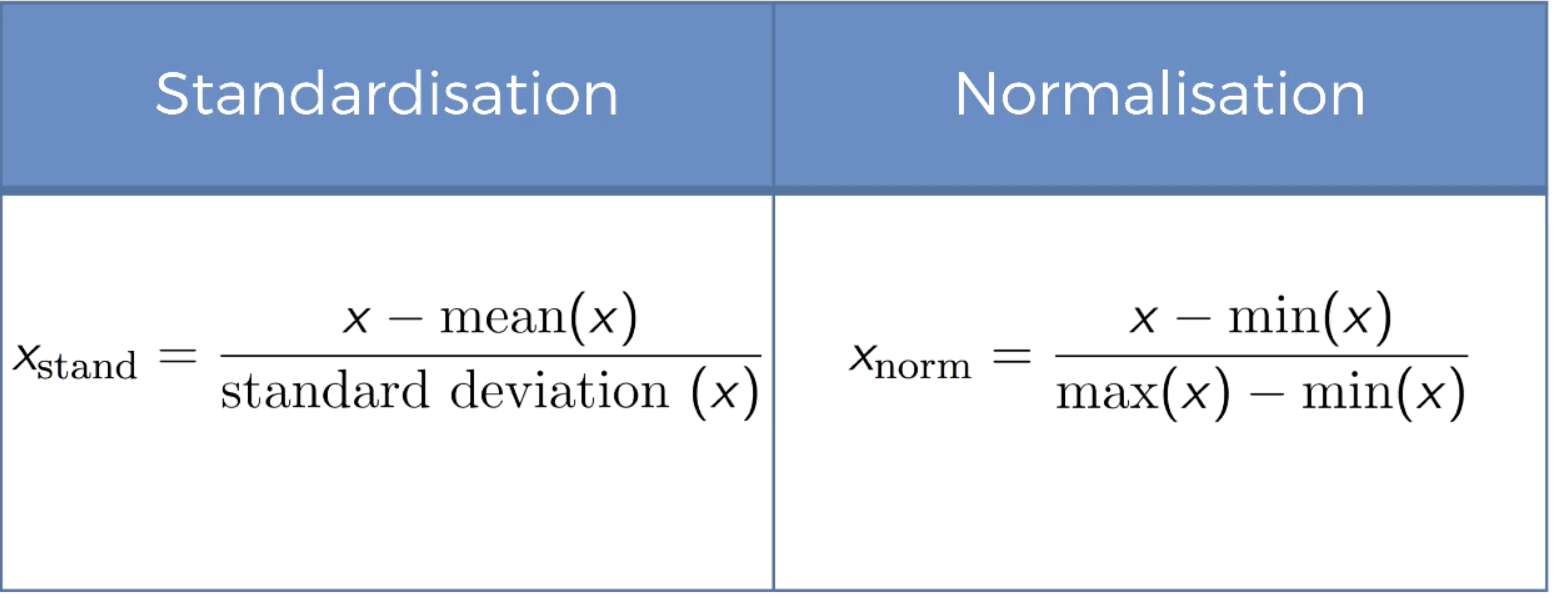

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_train

- Euclidean Distance를 사용하지 않는 알고리즘에서도 Feature Scaling이 필요할까요?
- Dummy Variable에도 Feature Scaling을 적용시켜야 할까요?
- Target Vector은 어떨때 Feature Scaling을 해야하고 하지말아야 할까요?

### 이제 향후 데이터들에 대해 전처리 할 일이 있으면 지금까지 짠 코드를 data_preprocessing_template.py 파일에 저장해놨으니 유용하게 쓰시면 됩니다.